In [1]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


### Drug Classification

Problem Statement:-

XYZ Pharma company/Hospital wants to build machine learning model to predict which drug type is good for the patient based on patient details.

### Import Liabraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and Exploring Data:-

In [3]:
drug = pd.read_csv('/content/drug200.csv')

In [4]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
drug.shape

(200, 6)

In [6]:
drug.info

<bound method DataFrame.info of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [7]:
drug.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [9]:
#Visualization
# get all the unique values in the 'Drug' column
Drug_ = drug['Drug'].unique()
#make a dictionary to be able to replace the string values with integers
Drug_dict=dict(enumerate(Drug_))
Drug_dict
#{0: 'DrugY', 1: 'drugC', 2: 'drugX', 3: 'drugA', 4: 'drugB'} Although it doesn't really matter, but I don't like the order.
Drug_dict={0: 'drugA', 1: 'drugB', 2: 'drugC', 3: 'drugX', 4: 'DrugY'}
#switch the value-keys
Drug_dict2 = {y:x for x,y in Drug_dict.items()}
drug['Drug_int']=drug['Drug'].replace(to_replace=Drug_dict2)
drug['Drug_int']

0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Drug_int, Length: 200, dtype: int64

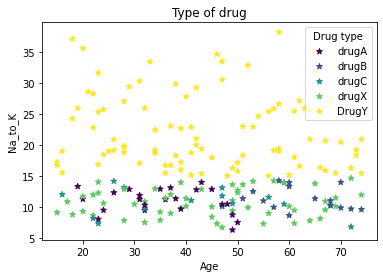

In [11]:
colors=np.array(drug['Drug_int'])
scatter=plt.scatter(drug['Age'], drug['Na_to_K'], s=None, c=colors, marker='*', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None)
plt.xlabel('Age')
plt.ylabel('Na_to_K')
plt.title('Type of drug')
#plt.axis([0, 1, 0, 0.4])
legend = plt.legend(handles=scatter.legend_elements()[0], labels=Drug_dict.values(), loc='upper right', title='Drug type')
plt.show()

In [12]:
print(drug.corr())

               Age   Na_to_K  Drug_int
Age       1.000000 -0.063119 -0.004828
Na_to_K  -0.063119  1.000000  0.589120
Drug_int -0.004828  0.589120  1.000000


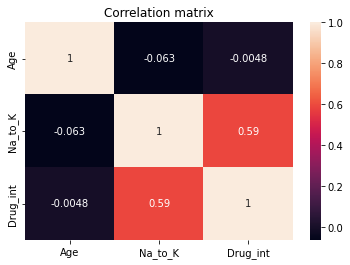

In [13]:
# plotting correlation heatmap
sns.heatmap(drug.corr(),annot=True)
# displaying heatmap
plt.title('Correlation matrix')
plt.show()

In [14]:
#teach the machine! 

# get all the unique values in the 'Sex' column
Sex_ = drug['Sex'].unique()
#make a dictionary to be able to replace the string values with integers
Sex_dict=dict(enumerate(Sex_))
#switch the value-keys
Sex_dict2 = {y:x for x,y in Sex_dict.items()}
drug['Sex_int']=drug['Sex'].replace(to_replace=Sex_dict2)
drug['Sex_int']

0      0
1      1
2      1
3      0
4      0
      ..
195    0
196    1
197    1
198    1
199    0
Name: Sex_int, Length: 200, dtype: int64

In [19]:
#Let's do the same with the other columns:
#columns_to_change=[drug['BP'], drug['Cholesterol'], drug['Drug']]
BP_ = drug['BP'].unique()
BP_dict=dict(enumerate(BP_))
#BP_dict
#{0: 'HIGH', 1: 'LOW', 2: 'NORMAL'} Uppsss! :D That's not the best dictionary, is it?
BP_dict={0: 'LOW', 1: 'NORMAL', 2: 'HIGH'}
#Much better. :)
BP_dict2 = {y:x for x,y in BP_dict.items()}
drug['BP_int']=drug['BP'].replace(to_replace=BP_dict2)
#Now, scale it between 0 and 1:
from mlxtend.preprocessing import minmax_scaling
drug['BP_scaled']=minmax_scaling(np.array(drug['BP_int']), columns=[0])

Cholesterol_= drug['Cholesterol'].unique()
Cholesterol_dict=dict(enumerate(Cholesterol_))
#Cholesterol_dict
#{0: 'HIGH', 1: 'NORMAL'} Not so good... :)
Cholesterol_dict={0: 'NORMAL', 1: 'HIGH'}
#Much better
Cholesterol_dict2 = {y:x for x,y in Cholesterol_dict.items()}
drug['Cholesterol_int']=drug['Cholesterol'].replace(to_replace=Cholesterol_dict2)
#drug['Cholesterol_int']
#Now, scale it between 0 and 1:
drug['Cholesterol_scaled']=minmax_scaling(np.array(drug['Cholesterol_int']), columns=[0])
drug['Cholesterol_scaled']

#Now, scale 'Age' between 0 and 1:
drug['Age_scaled']=minmax_scaling(np.array(drug['Age']), columns=[0])
drug['Age_scaled']

#Now, scale 'Na_to_K' between 0 and 1:
drug['Na_to_K_scaled']=minmax_scaling(np.array(drug['Na_to_K']), columns=[0])
drug['Na_to_K_scaled']

0      0.596848
1      0.213397
2      0.120239
3      0.047814
4      0.368191
         ...   
195    0.165676
196    0.179405
197    0.113359
198    0.242385
199    0.158859
Name: Na_to_K_scaled, Length: 200, dtype: float64

In [20]:
#Data, I use to teach the machine:
X=drug[['Age_scaled', 'Sex_int','BP_scaled','Cholesterol_scaled','Na_to_K_scaled']]
y=drug['Drug_int']

#train test- split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.30, random_state=1, stratify= y)

In [21]:
#Next step to create a function to test more models and choose the best:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


def get_acs(model, X_train, X_test, y_train, y_test):
 model.fit(X_train, y_train)
 y_pred=model.predict(X_test)
 acs=accuracy_score(y_test, y_pred)
 return(acs)

models=[KNeighborsClassifier(n_neighbors=5),DecisionTreeRegressor(min_samples_split=2, min_samples_leaf=1),DecisionTreeClassifier(), RandomForestClassifier()]

mds_acs={}
for mod in models:
 my_acs=get_acs(mod, X_train, X_test, y_train, y_test)
 print("Model: %s \t accuracy_score:  %f" %(mod, my_acs))
 mds_acs[mod]=my_acs

best_model = max(mds_acs, key=mds_acs.get)
worst_model = min(mds_acs, key=mds_acs.get)
print(best_model)

Model: KNeighborsClassifier() 	 accuracy_score:  0.650000
Model: DecisionTreeRegressor() 	 accuracy_score:  1.000000
Model: DecisionTreeClassifier() 	 accuracy_score:  1.000000
Model: RandomForestClassifier() 	 accuracy_score:  1.000000
DecisionTreeRegressor()


best_model_confusion matrix: [[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 27]]
worst_model: [[ 6  0  0  0  1]
 [ 0  4  0  0  1]
 [ 0  0  5  0  0]
 [ 0  0  0 14  2]
 [ 4  2  4  7 10]]


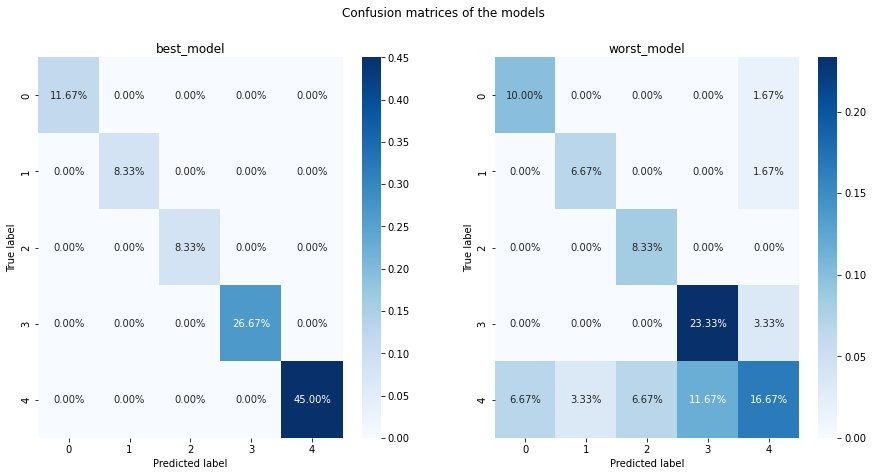

In [22]:
#Evaluation

best_model.fit(X_train, y_train)
worst_model.fit(X_train, y_train)

#Prediction
y_pred1= best_model.predict(X_test)
y_pred2= worst_model.predict(X_test)

#Visualization of evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("best_model_confusion matrix:", confusion_matrix(y_test, y_pred1))
print("worst_model:", confusion_matrix(y_test, y_pred2))
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)

plt.subplots(1, 2, figsize=(15,7))
plt.subplot(1,2,1)
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='.2%', cmap='Blues')
plt.title('best_model')
plt.ylabel('True label')
plt.xlabel('Predicted label')


plt.subplot(1,2,2)
sns.heatmap(cm2/np.sum(cm2), annot=True, fmt='.2%', cmap='Blues')
plt.title('worst_model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.suptitle('Confusion matrices of the models')
plt.show()

In [23]:
model=DecisionTreeClassifier(random_state=1)

#Evaluation
model=model.fit(X_train, y_train)

from sklearn.tree import export_text
r= export_text(model)
print(r)

|--- feature_4 <= 0.27
|   |--- feature_2 <= 0.75
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 3
|   |   |--- feature_3 >  0.50
|   |   |   |--- feature_2 <= 0.25
|   |   |   |   |--- class: 2
|   |   |   |--- feature_2 >  0.25
|   |   |   |   |--- class: 3
|   |--- feature_2 >  0.75
|   |   |--- feature_0 <= 0.60
|   |   |   |--- class: 0
|   |   |--- feature_0 >  0.60
|   |   |   |--- class: 1
|--- feature_4 >  0.27
|   |--- class: 4



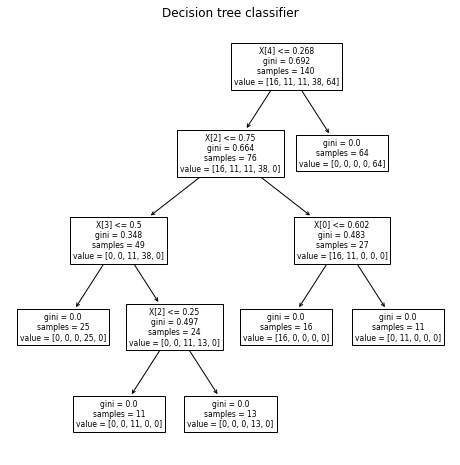

In [24]:
from sklearn import tree
plt.figure(figsize=[8, 8])
tree.plot_tree(model)
plt.title("Decision tree classifier")
plt.show()


In [25]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(x):
    le = LabelEncoder()
    drug[x] = le.fit_transform(drug[x])

In [26]:
categ = ["Sex","BP","Cholesterol","Drug"]

for l in categ:
    label_encoder(l)

In [27]:
drug.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_int,Sex_int,BP_int,BP_scaled,Cholesterol_int,Cholesterol_scaled,Age_scaled,Na_to_K_scaled
0,23,0,0,0,25.355,0,4,0,2,1.0,1,1.0,0.135593,0.596848
1,47,1,1,0,13.093,3,2,1,0,0.0,1,1.0,0.542373,0.213397
2,47,1,1,0,10.114,3,2,1,0,0.0,1,1.0,0.542373,0.120239
3,28,0,2,0,7.798,4,3,0,1,0.5,1,1.0,0.220339,0.047814
4,61,0,1,0,18.043,0,4,0,0,0.0,1,1.0,0.779661,0.368191


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [29]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: ', round((clf.score(X_train, y_train)),2))
print('Accuracy of Decision Tree classifier on test set: ', round((clf.score(X_test, y_test)),2))

Accuracy of Decision Tree classifier on training set:  1.0
Accuracy of Decision Tree classifier on test set:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


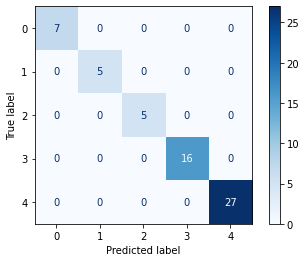

<Figure size 864x864 with 0 Axes>

In [31]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  
plt.figure(figsize = (12, 12))
plt.show()

In [32]:
#Generating classification report
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        27

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [33]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: ', round((knn.score(X_train, y_train)),2))
print('Accuracy of K-NN classifier on test set: ', round((knn.score(X_test, y_test)),2))

Accuracy of K-NN classifier on training set:  0.86
Accuracy of K-NN classifier on test set:  0.65


In [34]:
#Naive Bayes Gaussian
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: ',round((gnb.score(X_train, y_train)),2))
print('Accuracy of GNB classifier on test set: ',round((gnb.score(X_test, y_test)),2))

Accuracy of GNB classifier on training set:  0.9
Accuracy of GNB classifier on test set:  0.73


In [35]:
#SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: ', round((svm.score(X_train, y_train)),2))
print('Accuracy of SVM classifier on test set: ', round((svm.score(X_test, y_test)),2))


Accuracy of SVM classifier on training set:  0.89
Accuracy of SVM classifier on test set:  0.63


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


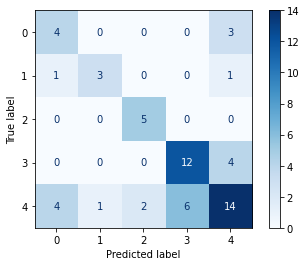

<Figure size 864x864 with 0 Axes>

In [36]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm, X_test, y_test, cmap=plt.cm.Blues)  
plt.figure(figsize = (12, 12))
plt.show()